# Flux at LGS channel

We estimate the flux at the LGS WFS as

$F_2 = F_1 \ T \ \tau \ \left(\dfrac{D}{N_{sa}}\right)^2$

where $F_2$ is the flux in [e$^-$/frame/sa] at the LGS WFS, $F_1$ is the Sodium return flux at the entrance pupil in [ph/s/m$^2$], $T$ is the transmittance of the LGS WFS path, $\tau$ is the LGS WFS integration time, $D$ is the ELT entrance pupil diameter and $N_{sa}$ is the number of subapertures of the LGS WFS.

In [1]:
import numpy as np
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from arte.photometry.morfeo_transmissive_systems import MorfeoLgsChannelTransmissiveSystem_003

  points: [3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900.
 5000. 5100. 5200. 5300. 5400. 5500.]
  lookup_table: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16] [synphot.models]


Flux at 0.589 μm: 683.7351306642662 e-/subap/frame


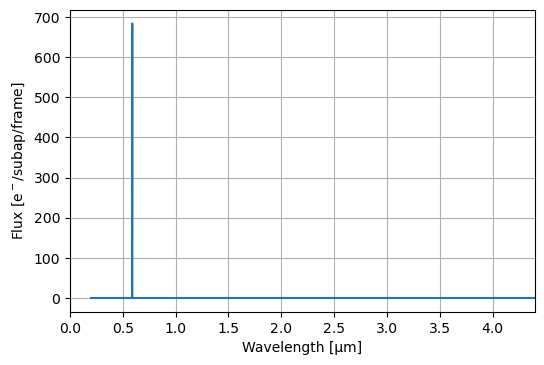

In [2]:
flux_at_M1 = 4.4e6 * u.ph/u.m**2/u.s
D_M1 = 38.542 * u.m
N_subap = 68
T = 2 * u.ms
lgs_ch = MorfeoLgsChannelTransmissiveSystem_003()
waveset = lgs_ch.transmittance.waveset
lgs_transmittance = lgs_ch.transmittance(waveset)

flux_at_lgs = flux_at_M1 * lgs_transmittance * T.to(u.s) * (D_M1 / N_subap)**2

mpl.rcParams['figure.dpi'] = 100
plt.plot(waveset.to(u.um), flux_at_lgs)
plt.grid()
plt.ylabel('Flux [e$^-$/subap/frame]')
plt.xlabel('Wavelength [μm]')
plt.xlim(0, 4.4)
print('Flux at 0.589 μm: %s e-/subap/frame' %flux_at_lgs[np.argmax(flux_at_lgs)].value)

In [3]:
print('Throughput at 589 nm: %s' %(lgs_transmittance.max()))

Throughput at 589 nm: 0.24185471244576406


In [4]:
transmittance_loss = 0.92 * 0.8
throughput = lgs_transmittance.max() * transmittance_loss
print('Throughput with losses: %s' %throughput)
flux_final = flux_at_M1 * throughput * T.to(u.s) * (D_M1 / N_subap)**2
print('Final flux: %s' %flux_final)

Throughput with losses: 0.17800506836008237
Final flux: 503.22905616889994 ph


In [10]:
#With Cedric's transmission
print(flux_at_M1 * 0.1927 * T.to(u.s) * (D_M1 / N_subap)**2)

#With worst-case LGS dichroic 
print(flux_at_M1 * throughput / 0.94445277 * 0.763 * T.to(u.s) * (D_M1 / N_subap)**2)

#With general throughput
print(flux_at_M1 * throughput / 0.850 * T.to(u.s) * (D_M1 / N_subap)**2)

544.7723484343945 ph
406.5462901409784 ph
592.0341837281177 ph
